# <a> Nile University


> 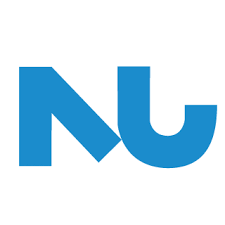

> ## <a> AI Hackathon Orientation

#pip

In [1]:
!pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.5 MB/s eta 0:00:00


In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 11.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [3]:
!pip install arabic-reshaper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install python-bidi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install PyArabic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 KB 4.1 MB/s eta 0:00:00


# Import

In [6]:
import random
import pandas as pd
import gdown

import json
import re
import string 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from collections import OrderedDict
import warnings

import torch
import numpy as np

from torch.utils.data import DataLoader
from datasets import load_dataset, load_metric, Dataset

from transformers import AutoTokenizer, DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification
from transformers import AdamW

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from scipy.special import softmax

import csv
import urllib.request

import gc

from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer

In [7]:
# import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from statistics import mean, stdev
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold,train_test_split,cross_val_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# import fuzzywuzzy
# from fuzzywuzzy import process
# import chardet

#Visualizing the Decision Tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus



import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import classification_report

import re
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from sklearn.model_selection import train_test_split

from pyarabic.araby import strip_tatweel
from pyarabic.araby import strip_shadda
from pyarabic.araby import normalize_hamza

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


> # Cleaning_1

In [8]:
# Load the data from a CSV file
df_train = pd.read_csv('/content/train.csv', encoding='utf-8')
df_test = pd.read_csv('/content/test.csv', encoding='utf-8')


In [9]:
df_train

,hadith_text,subtext,Named_entity
0,حدثنا محمد بن المثنى ، حدثنا إسحاق بن يوسف ، ح...,الظهر,0
1,حدثنا أبو اليمان ، أخبرنا شعيب ، عن الزهري ، ق...,والمروة,1
2,حدثنا عبد الله بن عبد الوهاب ، حدثنا خالد بن ا...,عشاء,0
3,حدثنا موسى بن إسماعيل ، حدثنا جرير بن حازم ، ح...,الربا,2
4,حدثنا عبد الله بن يوسف ، أخبرنا مالك ، عن إسحا...,مالك,3
...,...,...,...
9363,حدثنا محمد بن عبد الله ، حدثنا عبد العزيز بن ع...,محمد بن عبد الله,3
9364,حدثنا أحمد بن محمد ، أخبرنا عبد الله ، أخبرنا ...,يونس,3
9365,حدثنا عمر بن حفص بن غياث ، حدثنا أبي ، حدثنا ا...,الأسود,3
9366,حدثنا عبد الله بن يوسف ، قال أخبرنا مالك ، عن ...,أبيه,3


In [10]:
df_test

,IDs,hadith_text,subtext,Named_entity
0,0,حدثنا خلاد بن يحيى ، حدثنا نافع بن عمر ، عن اب...,نافع بن عمر,
1,1,حدثنا عمر بن حفص ، حدثنا أبي ، حدثنا الأعمش ، ...,صفية,
2,2,حدثنا الصلت بن محمد ، حدثنا عبد الواحد ، حدثنا...,ابن عباس,
3,3,حدثنا عبد الله بن يوسف ، أخبرنا مالك ، عن نافع...,نافع,
4,4,حدثني عبد الله بن محمد ، حدثنا إسحاق الأزرق ، ...,الظهر,
...,...,...,...,...
2337,2337,حدثنا محمد بن سلام ، أخبرنا الفزاري ، عن حميد ...,الفزاري,
2338,2338,حدثنا قتيبة بن سعيد ، حدثنا ليث ، عن ابن شهاب ...,الأعرج,
2339,2339,حدثنا محمد بن العلاء ، حدثنا حماد بن أسامة ، ع...,ردة,
2340,2340,حدثنا علي بن عبد الله ، حدثنا سفيان ، حدثنا ال...,سفيان,


> In this example, the `clean_text()` function performs several cleaning and preprocessing steps on the text data, including:

> *   Removing **HTML** tags
*   Removing punctuations and numbers
*   Normalize hamza
*   Remove tatweel
*   Remove shadda
*   Removing stopwords
*   You can adjust the cleaning and preprocessing steps to fit your specific use case. 

> After cleaning the text data, the code splits the data into training and testing sets, and converts the text data to numerical features using a **CountVectorizer** or **TfidfVectorizer**. You can use these features as input to a machine learning model.

In [11]:
# Define a function for cleaning and preprocessing the text data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<[^>]*>', '', text)
    
    # Remove punctuations and numbers
    text = re.sub('[%s]' % re.escape(string.punctuation + string.digits), '', text)
    
    # # Convert to lowercase
    # text = text.lower()
    
    
    # # Remove diacritics and reshape the Arabic text
    # # But Note, we don't need this in our problem.
    # text = get_display(reshape(text))

    # Normalize hamza
    text = normalize_hamza(text)

    # Remove tatweel
    text = strip_tatweel(text)
    
    # Remove shadda
    text = strip_shadda(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('arabic'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)
    
    return text


In [12]:
# Apply the cleaning function to the text columns

df_train['hadith_text'] = df_train['hadith_text'].astype(str)
df_train['subtext'] = df_train['subtext'].astype(str)

df_test['hadith_text'] = df_test['hadith_text'].astype(str)
df_test['subtext'] = df_test['subtext'].astype(str)

df_train['hadith_text'] = df_train['hadith_text'].apply(clean_text)
df_train['subtext'] = df_train['subtext'].apply(clean_text)

df_test['hadith_text'] = df_test['hadith_text'].apply(clean_text)
df_test['subtext'] = df_test['subtext'].apply(clean_text)

> If you want to take a look at it.

In [13]:
df_train

,hadith_text,subtext,Named_entity
0,حدثنا محمد بن المثنى ، حدثنا ءسحاق بن يوسف ، ح...,الظهر,0
1,حدثنا ءبو اليمان ، ءخبرنا شعيب ، الزهري ، قال ...,والمروة,1
2,حدثنا عبد الله بن عبد الوهاب ، حدثنا خالد بن ا...,عشاء,0
3,حدثنا موسى بن ءسماعيل ، حدثنا جرير بن حازم ، ح...,الربا,2
4,حدثنا عبد الله بن يوسف ، ءخبرنا مالك ، ءسحاق ب...,مالك,3
...,...,...,...
9363,حدثنا محمد بن عبد الله ، حدثنا عبد العزيز بن ع...,محمد بن عبد الله,3
9364,حدثنا ءحمد بن محمد ، ءخبرنا عبد الله ، ءخبرنا ...,يونس,3
9365,حدثنا عمر بن حفص بن غياث ، حدثنا ءبي ، حدثنا ا...,الءسود,3
9366,حدثنا عبد الله بن يوسف ، قال ءخبرنا مالك ، هشا...,ءبيه,3


In [14]:
df_test

,IDs,hadith_text,subtext,Named_entity
0,0,حدثنا خلاد بن يحيى ، حدثنا نافع بن عمر ، ابن ء...,نافع بن عمر,
1,1,حدثنا عمر بن حفص ، حدثنا ءبي ، حدثنا الءعمش ، ...,صفية,
2,2,حدثنا الصلت بن محمد ، حدثنا عبد الواحد ، حدثنا...,ابن عباس,
3,3,حدثنا عبد الله بن يوسف ، ءخبرنا مالك ، نافع ، ...,نافع,
4,4,حدثني عبد الله بن محمد ، حدثنا ءسحاق الءزرق ، ...,الظهر,
...,...,...,...,...
2337,2337,حدثنا محمد بن سلام ، ءخبرنا الفزاري ، حميد الط...,الفزاري,
2338,2338,حدثنا قتيبة بن سعيد ، حدثنا ليث ، ابن شهاب ، ا...,الءعرج,
2339,2339,حدثنا محمد بن العلاء ، حدثنا حماد بن ءسامة ، ب...,ردة,
2340,2340,حدثنا علي بن عبد الله ، حدثنا سفيان ، حدثنا ال...,سفيان,


In [15]:
df_train.to_csv('training_after_cleaning1.csv', index = False)
df_test.to_csv('test_after_cleaning1.csv', index = False)